# Feature Engineering

Creating, transforming, or selecting features (input variables) to improve the performance of machine learning models.


🛠️ Raw data → Useful features → Better model accuracy

### Key Tasks in Feature Engineering

1. 🧹 Handling Missing Data
2. ⚖️ Handling Imbalanced Datasets
3. 🌱 SMOTE (Synthetic Minority Over-sampling Technique)
4. ⚠️ Handling Outliers
5. 🔤 Data Encoding

In [41]:
import seaborn as sns

In [42]:
df = sns.load_dataset("titanic")

In [43]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [44]:
## check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [45]:
df.shape

(891, 15)

In [46]:
df.dropna().shape

(182, 15)

In [47]:
#coloumn wise deletion
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing Values

Imputation is the process of replacing missing (null/NaN) values in your dataset with substitute values, so you can use the data for analysis or machine learning without errors.



1.Mean value imputation

Mean imputation is a method where missing values in a numerical column are replaced with the mean (average) of the non-missing values of that column.

<Axes: xlabel='age', ylabel='Count'>

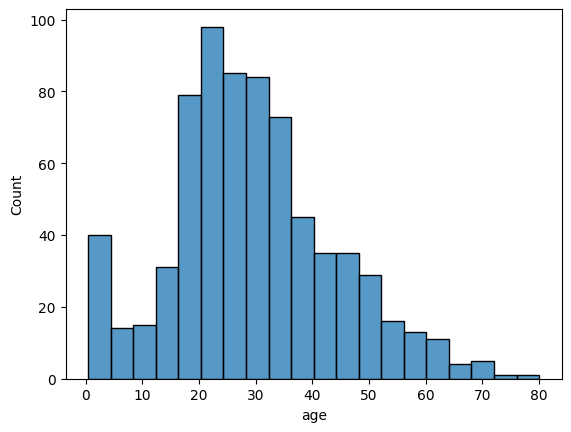

In [48]:
sns.histplot(df['age'])

In [49]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

In [50]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


^
  Mean imputation works well when we have normally distributed data

2.Median value imputation

Median imputation replaces missing values in a numerical column with the median (middle value) of the non-missing entries.

why it use?

if we have outliers in the dataset





In [51]:
df['age_median']=df['age'].fillna(df['age'].median())

In [52]:
df[['age_median','age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


3. Mode imputation technique

Mode Imputation is a data cleaning technique where missing values in a column are filled with the mode — the value that appears most frequently in that column.

why use--Mainly for categorical features (e.g., Gender, City, Department)

 Also used for discrete numerical data with repeating values



In [53]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0


In [54]:
df[df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [55]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [56]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

1. df['embarked'].notna()
Returns a Boolean Series: True where 'embarked' is not null, and False where it is NaN.

2. df[df['embarked'].notna()]
Filters the DataFrame to include only rows where 'embarked' is not missing.

3. ['embarked']
Selects the 'embarked' column from the filtered DataFrame.

4. .mode()
Calculates the mode (most frequent value) of the 'embarked' column.

This returns a Series with the most frequent value(s).

5. [0]
Gets the first value of the mode series. Even though mode can return multiple values, here we pick just one (the most common one).

In [57]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [58]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [59]:
df['embarked_mode'].isnull().sum()

np.int64(0)

In [60]:
df['embarked'].isnull().sum()

np.int64(2)

## Handling Imbalance Dataset

1. up sampling
2. Down sampling

In [61]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

np.random.seed(123): Ensures the random numbers generated will be the same every time you run the code — great for reproducibility in experiments or models.

You are going to create 1,000 total samples.
class_0_ratio = 0.9 means 90% of the samples will belong to Class 0.

n_class_0 = int(1000 * 0.9) → n_class_0 = 900
So, you’ll have 900 samples for Class 0.

n_class_1 = 1000 - 900 → n_class_1 = 100
The remaining 100 samples will be for Class 1.

Class 0 → 900 samples
Class 1 → 100 samples



In [62]:
n_class_0,n_class_1

(900, 100)

In [63]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [64]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [65]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [66]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

upsampling-- Increasing the number of samples in the minority class by duplicating or generating new synthetic data.

In [67]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

df_minority: All rows where target == 1 (minority class)

df_majority: All rows where target == 0 (majority class)

In [68]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True,
         n_samples=len(df_majority),
         random_state=42)

replace=True: Allows the same row to be picked more than once (i.e., with replacement).

n_samples=len(df_majority): You're making the number of samples in the minority class equal to the majority class.

This is upsampling the minority class to balance the dataset.

In [69]:
df_minority_upsampled.shape

(900, 3)

In [70]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

 now i have a balanced dataset: both classes have equal number of samples.



In [71]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

## Down sampling


Reducing the number of samples in the majority class to match the minority class.

In [72]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [73]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False,
         n_samples=len(df_minority),
         random_state=42)

In [74]:
df_majority_downsampled.shape

(100, 3)

In [75]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])

In [76]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

## SMOTE


SMOTE doesn’t just copy — it creates new fake data points for Class 1 using math.

Here’s how:

Pick a Class 1 data point.

Look at its nearest neighbors (other similar Class 1 points).

Draw a line between them.

Add a new point somewhere on that line.

🧬 This creates new, slightly different data, not duplicates.



In [77]:
from sklearn.datasets import make_classification

In [78]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                    weights=[0.90],random_state=12)

n_samples=1000: Create 1000 total rows (data points).

n_features=2: We’ll have only 2 input features (f1 and f2).

n_redundant=0: No extra unnecessary (redundant) features.

n_clusters_per_class=1: One cluster per class for simplicity.

weights=[0.90]: 90% of samples are class 0, and 10% are class 1 — this creates imbalance.

random_state=12: Ensures you get the same result every time (reproducibility).



In [79]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()


,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


We're converting the NumPy arrays X and y into DataFrames for easy handling.

Then, we combine features and target columns into a single DataFrame: final_df.



In [80]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

A print of how many samples belong to class 0 vs class 1 — you'll see class 0 has many more.

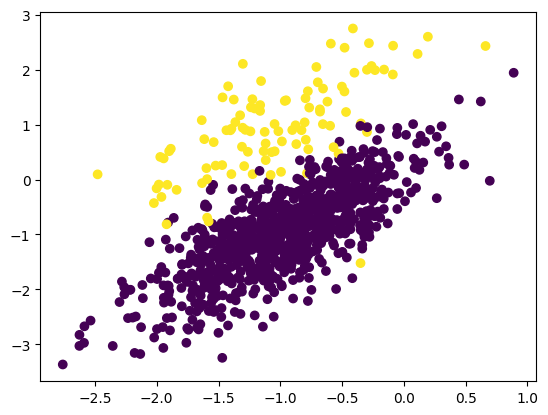

In [81]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

A 2D scatter plot where points are colored based on the class (target) — class imbalance is visually clear.



In [82]:
from imblearn.over_sampling import SMOTE


In [83]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

c:\Users\NILESH\anaconda3\envs\ml-env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


SMOTE Magic:
SMOTE = Synthetic Minority Over-sampling Technique.

It generates new (synthetic) data points for the minority class by interpolating between existing minority samples.

Result: Classes become balanced — the number of class 1 samples now equals class 0.



In [84]:
X.shape

(1800, 2)

In [85]:
y.shape

(1800,)

In [86]:
len(y[y==0])

900

In [87]:
len(y[y==1])

900

In [88]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

Same as before — convert the resampled arrays into a clean DataFrame to use in ML or visualization.



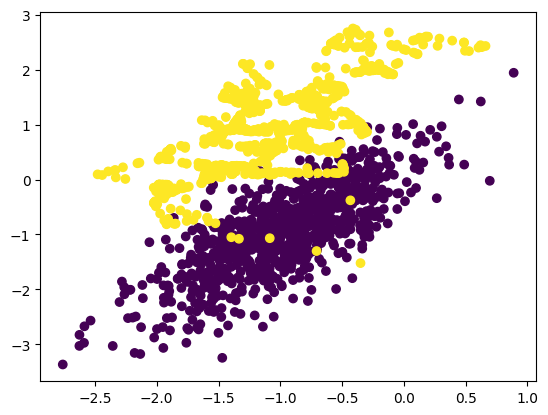

In [89]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

Now the plot will show a balanced distribution — visually you'll see more class 1 points



## Handling outliers

### 5 number summary and box plot

minimum, maximum, median , Q1, Q3 IQR

In [90]:
import numpy as np

In [91]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [92]:
minimum,Q1,median,Q3,maximum

(np.float64(32.0),
 np.float64(54.0),
 np.float64(67.0),
 np.float64(89.0),
 np.float64(99.0))

In [93]:

IQR=Q3-Q1
print(IQR)

35.0


In [94]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)

In [95]:
lower_fence

np.float64(1.5)

In [96]:
higher_fence

np.float64(141.5)

In [97]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

In [98]:
import seaborn as sns

<Axes: >

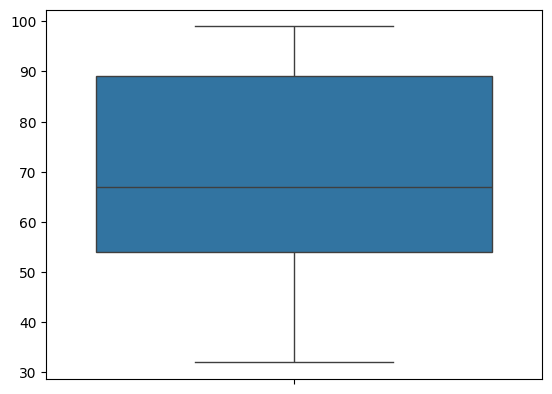

In [99]:
sns.boxplot(lst_marks)

In [100]:
lst_marks=[-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]

<Axes: >

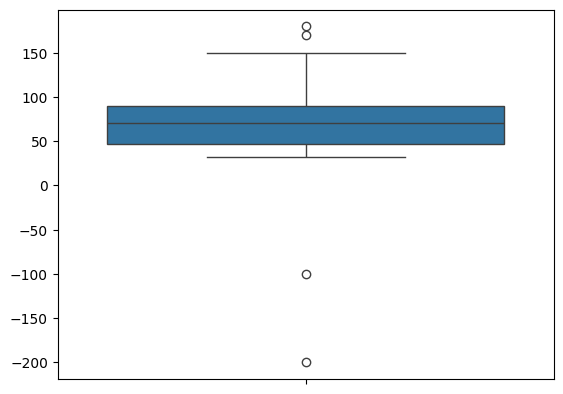

In [101]:
sns.boxplot(lst_marks)

## Data encoding

It's a technique to convert categorical data into numbers. ML algorithms can't handle text, so we encode categories as numbers.



### Nominal/One hot encoding

One Hot Encoding transforms categorical variables into binary vectors.
Each unique category gets its own column, and we use 0 or 1 to indicate the presence of that category.

 Why Use It?
Categorical data like ["Red", "Green", "Blue"] can't be directly used by ML models.

One Hot Encoding avoids giving categories any implicit order (unlike label encoding).

red green blue
1	 0	   0
0	 1	   0
0	 0	   1
1	 0	   0

In [102]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [103]:
df=pd.DataFrame({'color':['red','blue','green','green','red','blue']})

In [104]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


create an instance of Onehotencoder

In [105]:
encoder=OneHotEncoder()

In [106]:
## perform fit and transform
encoded=encoder.fit_transform(df[['color']]).toarray()

In [107]:
import pandas as pd
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [108]:
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [109]:
##for new data
encoder.transform([['blue']]).toarray()

c:\Users\NILESH\anaconda3\envs\ml-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [110]:
pd.concat([df,encoder_df], axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [111]:
import seaborn as sns
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Label Encoding

Label Encoding is the process of converting categorical text data (like 'Red', 'Green') into numerical labels (like 0, 1, 2).

Each unique category is assigned an integer value.

In [112]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [113]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()

In [114]:
lbl_encoder.fit_transform(df[['color']])

c:\Users\NILESH\anaconda3\envs\ml-env\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [115]:
lbl_encoder.transform([['red']])

c:\Users\NILESH\anaconda3\envs\ml-env\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

In [116]:
lbl_encoder.transform([['blue']])

c:\Users\NILESH\anaconda3\envs\ml-env\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0])

## Ordinal Encoding

Ordinal Encoding assigns integer values to categories based on their order or ranking.

Unlike label encoding (which is arbitrary), ordinal encoding assumes the categories follow a logical order.



 ["Small", "Large", "Medium", "Small"] → [0, 2, 1, 0]

In [117]:
from sklearn.preprocessing import OrdinalEncoder
df=pd.DataFrame({'size':['small','medium','large','medium','small','large']})

In [118]:
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [119]:
## instance of ordinal encoder and then fit_transform
encoder=OrdinalEncoder(categories=[['small','medium','large']])

In [120]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [121]:
encoder.transform([['small']])

c:\Users\NILESH\anaconda3\envs\ml-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

## Target Guided Ordinal Encoding


Target Guided Ordinal Encoding is a categorical encoding technique in which:

Categories are replaced with ordinal numbers based on the average (or other statistic) of the target variable for each category.

This method uses the relationship between the categorical feature and the target variable to assign meaningful numerical values.

In [122]:
df=pd.DataFrame({
    'city':['newyork','london','paris','tokyo','newyork','paris'],
    'price':[200,150,300,250,180,320]
})

In [123]:
df

,city,price
0,newyork,200
1,london,150
2,paris,300
3,tokyo,250
4,newyork,180
5,paris,320


In [124]:
mean_price=df.groupby('city')['price'].mean().to_dict()

In [125]:
mean_price

{'london': 150.0, 'newyork': 190.0, 'paris': 310.0, 'tokyo': 250.0}

In [126]:
df['city_encoded']=df['city'].map(mean_price)

In [127]:
df

,city,price,city_encoded
0,newyork,200,190.0
1,london,150,150.0
2,paris,300,310.0
3,tokyo,250,250.0
4,newyork,180,190.0
5,paris,320,310.0


In [128]:
df[['city','city_encoded']]

,city,city_encoded
0,newyork,190.0
1,london,150.0
2,paris,310.0
3,tokyo,250.0
4,newyork,190.0
5,paris,310.0
